In [ ]:
%pip install transformers accelerate bitsnbytes datasets evaluate rouge_score unbabel-comet

In [1]:
from huggingface_hub import login
login()

In [2]:
from datasets import load_dataset
from transformers import AutoModelForSeq2SeqLM, AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import torch

In [3]:
dataset = load_dataset("MattBoraske/reddit-AITA-binary-submissions-and-comments-top-2k")

In [4]:
hf_repo = "MattBoraske/flan-t5-xl-reddit-AITA-binary-top-2k"

In [5]:
bnb_config = BitsAndBytesConfig(
  load_in_4bit=True,
  bnb_4bit_quant_type='nf4',
  bnb_4bit_compute_dtype='float16',
  bnb_4bit_use_double_quant=False,
)

In [6]:
tokenizer = AutoTokenizer.from_pretrained(hf_repo)
model = AutoModelForSeq2SeqLM.from_pretrained(
  hf_repo,
  device_map='auto',
  quantization_config=bnb_config,
  torch_dtype=torch.bfloat16
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [7]:
from model_evaluator import Model_Evaluator

In [8]:
output_file = 'flan-t5-xl-reddit-AITA-binary-predictions.json'
submission_texts, predictions, references, predicted_classes, correct_classes, ambiguity_scores = Model_Evaluator.get_model_predictions(
    model, 
    tokenizer,
    dataset['test'].select(range(10)),
    output_file
)

Predicted AITA_classs: NTA	Correct AITA_classs: YTA
Predicted AITA_classs: NTA	Correct AITA_classs: NTA
Predicted AITA_classs: YTA	Correct AITA_classs: NTA
Predicted AITA_classs: YTA	Correct AITA_classs: YTA
Predicted AITA_classs: NTA	Correct AITA_classs: YTA
Predicted AITA_classs: NTA	Correct AITA_classs: NTA
Predicted AITA_classs: YTA	Correct AITA_classs: YTA
Predicted AITA_classs: NTA	Correct AITA_classs: NTA
Predicted AITA_classs: NTA	Correct AITA_classs: YTA
Predicted AITA_classs: NTA	Correct AITA_classs: YTA


In [9]:
classification_type = 'binary'
output_files = [
    'classification_report.json',
    ('Flan-T5-XL-Reddit-AITA-Binary-Top-2k Classifications', 'confusion_matrix.png'),
    'mcc.json',
    'ROGUE_scores.json',
    'BLEU_scores.json',
    'COMET_scores.json'
]

Predictions with no AITA class: 0
Classification report written to classification_report.json
Confusion matrix plot written to confusion_matrix.png
Matthews correlation coefficient written to mcc.json


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

LICENSE:   0%|          | 0.00/9.69k [00:00<?, ?B/s]

c:\Users\mattb\Documents\GitHub\Reddit_AITA_Finetuning\aita-finetuning\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mattb\.cache\huggingface\hub\models--Unbabel--wmt22-comet-da. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


.gitattributes:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

hparams.yaml:   0%|          | 0.00/567 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.53k [00:00<?, ?B/s]

checkpoints/model.ckpt:   0%|          | 0.00/2.32G [00:00<?, ?B/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.2.1. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\mattb\.cache\huggingface\hub\models--Unbabel--wmt22-comet-da\snapshots\371e9839ca4e213dde891b066cf3080f75ec7e72\checkpoints\model.ckpt`


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

c:\Users\mattb\Documents\GitHub\Reddit_AITA_Finetuning\aita-finetuning\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mattb\.cache\huggingface\hub\models--xlm-roberta-large. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

c:\Users\mattb\Documents\GitHub\Reddit_AITA_Finetuning\aita-finetuning\Lib\site-packages\pytorch_lightning\core\saving.py:188: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:You are using a CUDA device ('NVIDIA GeForce RTX 3070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:pytorch_lightning.accele

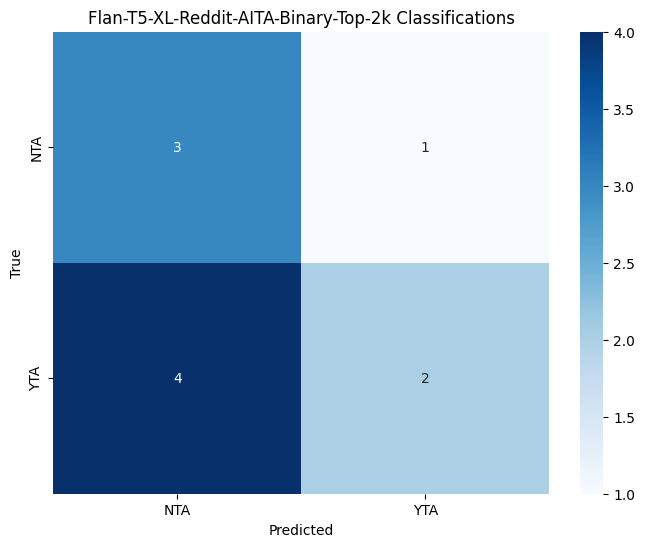

In [10]:
Model_Evaluator.evaluate_model(
    submission_texts=submission_texts,
    predictions=predictions,
    references=references,
    AITA_classes=predicted_classes,
    correct_AITA_classes=correct_classes,
    ambiguity_scores=ambiguity_scores,
    classification_type=classification_type,
    output_files=output_files
)

In [13]:
references

['yta- your sister obviously has a lot of complicated feelings about your mother. that’s okay. it’s not your place to deny her right to participate in this tradition. your are being cruel.',
 "nta. he's obviously hiding something. no sane person with nothing to hide *locks up their clothes*.\n\nit's completely normal to go through pockets when doing the laundry, either to take out forgotten cash or receipts.\n\ni'm willing to bet there was a phone number on that piece of paper.",
 "nta. \n\neven if you didn't have diabetes. people dont get to come into public space and dictate anyone else's acceptable behaviour.",
 'yta. i can’t believe you were taking a shot at the interview, got caught, and even have to ask.',
 'yta. \n\nyou and your husband should move to the living room. it’s *your* life choices that are preventing your kids from having a healthy amount of room to help them develop a sense of individuality and autonomy. \n\nyour son and daughter’s quality of life needs to be a prio

In [22]:
predictions

["nta. you're the one who needs to ask yourself why she wants the pin and what it means to her.",
 'nta. the paper you pulled out is just a piece of paper. your husband has no right to tell you what he thinks about your search of his pockets. if you want to see important documents, you should ask him.',
 'yta. if you want to control other people then you book all the seats in a row or you fucking fly private.',
 'yta. you were just trying to calm your nerves and you should have been more careful with the absinthe.',
 "nta. you're letting your daughter think she's entitled to her own space.",
 'nta. the idea that your girlfriend was going to ruin your weekend trip is not acceptable. she should pay for a new prosthesis.',
 "yta. you should've minded your own business.",
 "nta. you have to be willing to punish them for breaking your rules, and it's not like they're going to get away with it for the rest of their lives.",
 'nta. if you are sick and your daughter is bored and wants to go ou

In [3]:
import json

with open('flan-t5-xl-reddit-AITA-binary-predictions.json') as f:
    results = json.load(f)

predictions = results['prediction_texts']
references = results['reference_texts']

In [6]:
import evaluate

In [7]:
bleurt = evaluate.load("bleurt", checkpoint='BLEURT-20')

Using default BLEURT-Base checkpoint for sequence maximum length 128. You can use a bigger model for better results with e.g.: evaluate.load('bleurt', 'bleurt-large-512').



INFO:tensorflow:Reading checkpoint C:\Users\mattb\.cache\huggingface\metrics\bleurt\default\downloads\extracted\73d5ddb07d67be3ce7f58e9b0f73d9bde6de73ebf7fa330f1903ba25843d96e7\bleurt-base-128.
INFO:tensorflow:Config file found, reading.
INFO:tensorflow:Will load checkpoint bert_custom
INFO:tensorflow:Loads full paths and checks that files exists.
INFO:tensorflow:... name:bert_custom
INFO:tensorflow:... vocab_file:vocab.txt
INFO:tensorflow:... bert_config_file:bert_config.json
INFO:tensorflow:... do_lower_case:True
INFO:tensorflow:... max_seq_length:128
INFO:tensorflow:Creating BLEURT scorer.
INFO:tensorflow:Creating WordPiece tokenizer.

INFO:tensorflow:WordPiece tokenizer instantiated.
INFO:tensorflow:Creating Eager Mode predictor.
INFO:tensorflow:Loading model.
INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


In [8]:
bleurt.compute(predictions=predictions, references=references)

{'scores': [-1.1937516927719116,
  -0.48916929960250854,
  -1.2897040843963623,
  -1.191359519958496,
  -1.397039771080017,
  -1.0501437187194824,
  -1.3094322681427002,
  -0.8730105757713318,
  -1.132265329360962,
  -1.4710850715637207]}